title 
“Analyzing Key Factors Affecting Restaurant Ratings and Popularity: A Data-Driven Approach”

In [1]:
import numpy as np
import pandas as pd 
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\amnaj\OneDrive\Desktop\zomoto\zomato.csv")
print(df)

      Unnamed: 0.1  Unnamed: 0         restaurant name     restaurant type  \
0                0           0            #FeelTheROLL         Quick Bites   
1                1           1              #L-81 Cafe         Quick Bites   
2                2           2                 #refuel                Cafe   
3                3           3      '@ Biryani Central       Casual Dining   
4                4           4              '@ The Bbq       Casual Dining   
...            ...         ...                     ...                 ...   
7100          7100        7100                  Zoey's                Cafe   
7101          7101        7101  ZOROY Luxury Chocolate      Dessert Parlor   
7102          7102        7102       Zu's Doner Kebaps  Takeaway, Delivery   
7103          7103        7103                   Zyara       Casual Dining   
7104          7104        7104                  Zyksha          Food Truck   

      rate (out of 5)  num of ratings  avg cost (two people) on

In [3]:
df['area'].value_counts()

area
Byresandra,Tavarekere,Madiwala    798
Bannerghatta Road                 552
Brookefield                       477
Brigade Road                      464
Indiranagar                       455
Electronic City                   403
Malleshwaram                      402
Kalyan Nagar                      384
Bellandur                         361
Banashankari                      359
Whitefield                        261
Marathahalli                      260
HSR                               241
Basavanagudi                      214
New BEL Road                      168
Koramangala 4th Block             162
Rajajinagar                       148
Lavelle Road                      141
Jayanagar                         127
Frazer Town                       126
Sarjapur Road                     108
Old Airport Road                   91
Church Street                      77
Koramangala 6th Block              71
JP Nagar                           69
Kammanahalli                       65
Koraman

In [4]:
df['restaurant type'].value_counts()

restaurant type
Quick Bites                  2840
Casual Dining                1634
Cafe                          403
Delivery                      358
Takeaway, Delivery            289
                             ... 
Food Court, Beverage Shop       1
Quick Bites, Food Court         1
Casual Dining, Sweet Shop       1
Quick Bites, Meat Shop          1
Club, Casual Dining             1
Name: count, Length: 81, dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'restaurant name', 'restaurant type',
       'rate (out of 5)', 'num of ratings', 'avg cost (two people)',
       'online_order', 'table booking', 'cuisines type', 'area',
       'local address'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
restaurant name           object
restaurant type           object
rate (out of 5)          float64
num of ratings             int64
avg cost (two people)    float64
online_order              object
table booking             object
cuisines type             object
area                      object
local address             object
dtype: object

In [7]:
df.describe(include = 'object')

,restaurant name,restaurant type,online_order,table booking,cuisines type,area,local address
count,7105,7105,7105,7105,7105,7105,7105
unique,7105,81,2,2,2175,30,90
top,Zyksha,Quick Bites,Yes,No,"North Indian, Chinese","Byresandra,Tavarekere,Madiwala",Whitefield
freq,1,2840,3727,6361,421,798,459


converting object to numeric yes\no to 1\0

In [8]:
df['online_order']= df['online_order'].map({'Yes':1,'No':0})
print(df['online_order'])

0       0
1       1
2       1
3       1
4       1
       ..
7100    1
7101    1
7102    0
7103    1
7104    0
Name: online_order, Length: 7105, dtype: int64


In [9]:
df['table booking']= df['table booking'].map({'Yes':1,'No':0})
print(df['table booking'])

0       0
1       0
2       0
3       0
4       0
       ..
7100    0
7101    0
7102    0
7103    0
7104    0
Name: table booking, Length: 7105, dtype: int64


In [10]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,0,0,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,1,0,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,1,0,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,1,0,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,1,0,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
5,5,5,'@99,"Takeaway, Delivery",3.4,37,200.0,0,0,"Mughlai, Biryani, Chinese, North Indian",Whitefield,Whitefield
6,6,6,'@Italy,Casual Dining,4.1,305,700.0,1,0,Italian,Banashankari,Kumaraswamy Layout
7,7,7,'@North Parontha Hut,"Takeaway, Delivery",2.8,40,300.0,0,0,North Indian,Indiranagar,Old Airport Road
8,8,8,1000 B.C,Quick Bites,3.2,49,300.0,1,0,"Arabian, Sandwich, Rolls, Burger","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
9,9,9,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,Casual Dining,3.7,41,450.0,0,0,"Biryani, North Indian","Byresandra,Tavarekere,Madiwala",BTM


In [11]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
print(df)

             restaurant name     restaurant type  rate (out of 5)  \
0               #FeelTheROLL         Quick Bites              3.4   
1                 #L-81 Cafe         Quick Bites              3.9   
2                    #refuel                Cafe              3.7   
3         '@ Biryani Central       Casual Dining              2.7   
4                 '@ The Bbq       Casual Dining              2.8   
...                      ...                 ...              ...   
7100                  Zoey's                Cafe              4.3   
7101  ZOROY Luxury Chocolate      Dessert Parlor              4.0   
7102       Zu's Doner Kebaps  Takeaway, Delivery              3.7   
7103                   Zyara       Casual Dining              3.8   
7104                  Zyksha          Food Truck              3.4   

      num of ratings  avg cost (two people)  online_order  table booking  \
0                  7                  200.0             0              0   
1                 4

In [12]:
df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,0,0,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,1,0,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,1,0,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,1,0,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,1,0,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [13]:
df.columns

Index(['restaurant name', 'restaurant type', 'rate (out of 5)',
       'num of ratings', 'avg cost (two people)', 'online_order',
       'table booking', 'cuisines type', 'area', 'local address'],
      dtype='object')

In [14]:
df.dtypes

restaurant name           object
restaurant type           object
rate (out of 5)          float64
num of ratings             int64
avg cost (two people)    float64
online_order               int64
table booking              int64
cuisines type             object
area                      object
local address             object
dtype: object

removing whitespaces  and removing special chars

In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['restaurant_name', 'restaurant_type', 'rate_(out_of_5)',
       'num_of_ratings', 'avg_cost_(two_people)', 'online_order',
       'table_booking', 'cuisines_type', 'area', 'local_address'],
      dtype='object')


In [16]:
df['restaurant_name'] = df['restaurant_name'].str.replace('[^A-Za-z0-9 &,-]+', '', regex=True).str.strip().str.lower()
print(df['restaurant_name'])

0                  feeltheroll
1                    l-81 cafe
2                       refuel
3              biryani central
4                      the bbq
                 ...          
7100                     zoeys
7101    zoroy luxury chocolate
7102          zus doner kebaps
7103                     zyara
7104                    zyksha
Name: restaurant_name, Length: 7105, dtype: object


In [17]:
df['restaurant_type'] = df['restaurant_type'].str.replace('[^A-Za-z0-9 &,-]+', '', regex=True).str.strip().str.lower()
print(df['restaurant_type'])

0              quick bites
1              quick bites
2                     cafe
3            casual dining
4            casual dining
               ...        
7100                  cafe
7101        dessert parlor
7102    takeaway, delivery
7103         casual dining
7104            food truck
Name: restaurant_type, Length: 7105, dtype: object


In [18]:
df['cuisines_type'] = df['cuisines_type'].str.replace('[^A-Za-z0-9 &,-]+', '', regex=True).str.strip().str.lower()
print(df['cuisines_type'])

0                                               fast food
1                                    fast food, beverages
2                                         cafe, beverages
3                               biryani, mughlai, chinese
4       bbq, continental, north indian, chinese, bever...
                              ...                        
7100                   cafe, italian, continental, burger
7101                                             desserts
7102                 turkish, fast food, biryani, chinese
7103                       north indian, mughlai, chinese
7104                                            fast food
Name: cuisines_type, Length: 7105, dtype: object


In [19]:
df['local_address'] = df['local_address'].str.replace('[^A-Za-z0-9 &,-]+', '', regex=True).str.strip().str.lower()
print(df['local_address'])

0               bellandur
1                     hsr
2       bannerghatta road
3            marathahalli
4               bellandur
              ...        
7100        sarjapur road
7101        church street
7102             rt nagar
7103           hbr layout
7104      south bangalore
Name: local_address, Length: 7105, dtype: object


In [20]:
df['area'] = df['area'].str.replace('[^A-Za-z0-9 &,-]+', '', regex=True).str.strip().str.lower()
print(df['area'])

0                            bellandur
1       byresandra,tavarekere,madiwala
2                    bannerghatta road
3                         marathahalli
4                            bellandur
                     ...              
7100                         bellandur
7101                      brigade road
7102                      malleshwaram
7103                      kammanahalli
7104                 bannerghatta road
Name: area, Length: 7105, dtype: object


In [21]:
#converting data types
numeric_cols = ['rate_(out_of_5)','num_of_ratings', 'avg_cost_(two_people)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df[numeric_cols].dtypes)


rate_(out_of_5)          float64
num_of_ratings             int64
avg_cost_(two_people)    float64
dtype: object


In [22]:
df.dtypes

restaurant_name           object
restaurant_type           object
rate_(out_of_5)          float64
num_of_ratings             int64
avg_cost_(two_people)    float64
online_order               int64
table_booking              int64
cuisines_type             object
area                      object
local_address             object
dtype: object

In [23]:
import numpy as np

df['rate_(out_of_5)'] = np.round(df['rate_(out_of_5)']).astype('Int64')
df['avg_cost_(two_people)'] = np.round(df['avg_cost_(two_people)']).astype('Int64')
print(df['rate_(out_of_5)'])
print(df['avg_cost_(two_people)'])

0       3
1       4
2       4
3       3
4       3
       ..
7100    4
7101    4
7102    4
7103    4
7104    3
Name: rate_(out_of_5), Length: 7105, dtype: Int64
0       200
1       400
2       400
3       550
4       700
       ... 
7100    600
7101    250
7102    350
7103    650
7104    200
Name: avg_cost_(two_people), Length: 7105, dtype: Int64


In [24]:
df.dtypes

restaurant_name          object
restaurant_type          object
rate_(out_of_5)           Int64
num_of_ratings            int64
avg_cost_(two_people)     Int64
online_order              int64
table_booking             int64
cuisines_type            object
area                     object
local_address            object
dtype: object

In [25]:
df.isnull().sum()

restaurant_name           0
restaurant_type           0
rate_(out_of_5)          68
num_of_ratings            0
avg_cost_(two_people)    57
online_order              0
table_booking             0
cuisines_type             0
area                      0
local_address             0
dtype: int64

In [26]:
#feature engineering
df['num_cuisines'] = df['cuisines_type'].str.count(',').fillna(0) + 1
print(df['num_cuisines'])

0       1
1       2
2       2
3       3
4       5
       ..
7100    4
7101    1
7102    4
7103    3
7104    1
Name: num_cuisines, Length: 7105, dtype: int64


In [27]:
df['area'] = df['area'].str.strip().str.title()
print(df['area'])

0                            Bellandur
1       Byresandra,Tavarekere,Madiwala
2                    Bannerghatta Road
3                         Marathahalli
4                            Bellandur
                     ...              
7100                         Bellandur
7101                      Brigade Road
7102                      Malleshwaram
7103                      Kammanahalli
7104                 Bannerghatta Road
Name: area, Length: 7105, dtype: object


In [28]:
#  Outlier handling (optional)
# Cap extreme cost and ratings using IQR method
Q1 = df['avg_cost_(two_people)'].quantile(0.25)
Q3 = df['avg_cost_(two_people)'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df = df[df['avg_cost_(two_people)'] <= upper_limit]
print(df)

             restaurant_name     restaurant_type  rate_(out_of_5)  \
0                feeltheroll         quick bites                3   
1                  l-81 cafe         quick bites                4   
2                     refuel                cafe                4   
3            biryani central       casual dining                3   
4                    the bbq       casual dining                3   
...                      ...                 ...              ...   
7100                   zoeys                cafe                4   
7101  zoroy luxury chocolate      dessert parlor                4   
7102        zus doner kebaps  takeaway, delivery                4   
7103                   zyara       casual dining                4   
7104                  zyksha          food truck                3   

      num_of_ratings  avg_cost_(two_people)  online_order  table_booking  \
0                  7                    200             0              0   
1                 4

In [29]:
#  Basic EDA summaries
print("\nSummary statistics:\n", df.describe())
print("\nUnique values per column:\n", df.nunique())


Summary statistics:
        rate_(out_of_5)  num_of_ratings  avg_cost_(two_people)  online_order  \
count           6323.0     6387.000000                 6387.0   6387.000000   
mean          3.525067      116.632535             422.348364      0.553155   
std           0.520199      293.019474             213.781963      0.497205   
min                2.0        1.000000                   40.0      0.000000   
25%                3.0       14.000000                  250.0      0.000000   
50%                4.0       40.000000                  400.0      1.000000   
75%                4.0       95.000000                  550.0      1.000000   
max                5.0     7113.000000                 1050.0      1.000000   

       table_booking  num_cuisines  
count    6387.000000   6387.000000  
mean        0.048066      2.340066  
std         0.213923      1.190011  
min         0.000000      1.000000  
25%         0.000000      1.000000  
50%         0.000000      2.000000  
75%    

EXPLORATORY ANALYSIS

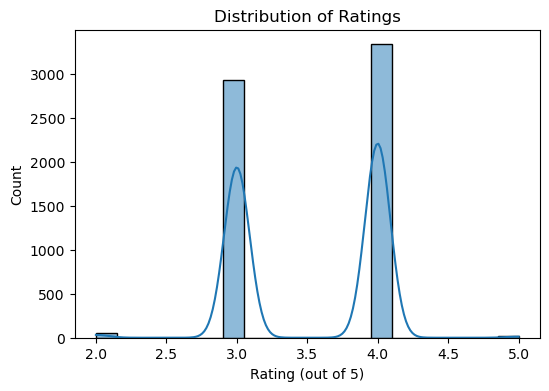

In [30]:
#  Rating distribution
plt.figure(figsize=(6,4))
sns.histplot(df['rate_(out_of_5)'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Count')
plt.show()

max 3400 people rate 3
nd 3000 people rate 4 


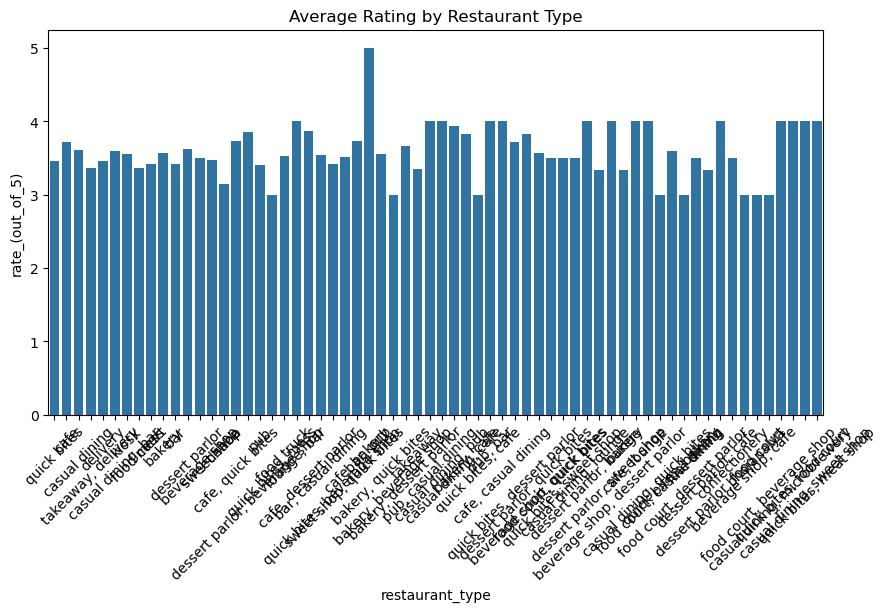

In [31]:
#  Average rating by restaurant type
plt.figure(figsize=(10,5))
sns.barplot(x='restaurant_type', y='rate_(out_of_5)', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Rating by Restaurant Type')
plt.xticks(rotation=45)
plt.show()

In [32]:
#alternative methid for ths
avg_rating = df.groupby('restaurant_type')['rate_(out_of_5)'].mean().reset_index()
avg_rating = avg_rating.sort_values(by='rate_(out_of_5)')
print(avg_rating)


               restaurant_type  rate_(out_of_5)
1        bakery, beverage shop              3.0
9          beverage shop, cafe              3.0
12                  bhojanalya              3.0
58           quick bites, mess              3.0
54           quick bites, cafe              3.0
..                         ...              ...
33  dessert parlor, food court              4.0
56     quick bites, food court              4.0
50          pub, casual dining              4.0
57      quick bites, meat shop              4.0
7                     bar, pub              5.0

[64 rows x 2 columns]


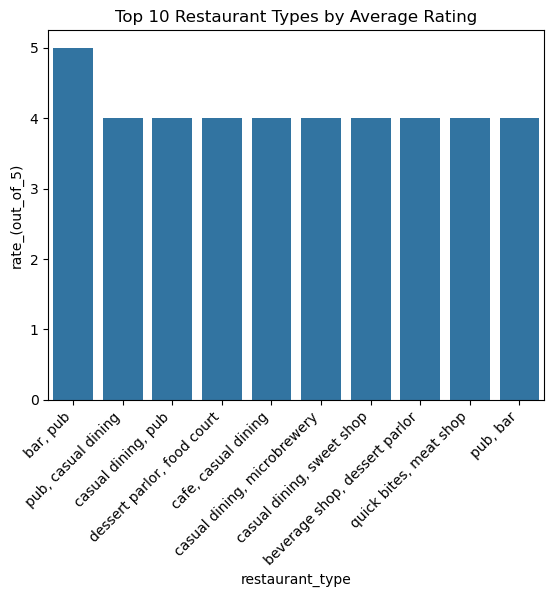

In [38]:
top_types = avg_rating.sort_values(by='rate_(out_of_5)', ascending=False).head(10)
sns.barplot(x='restaurant_type', y='rate_(out_of_5)', data=top_types)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Restaurant Types by Average Rating')
plt.show()


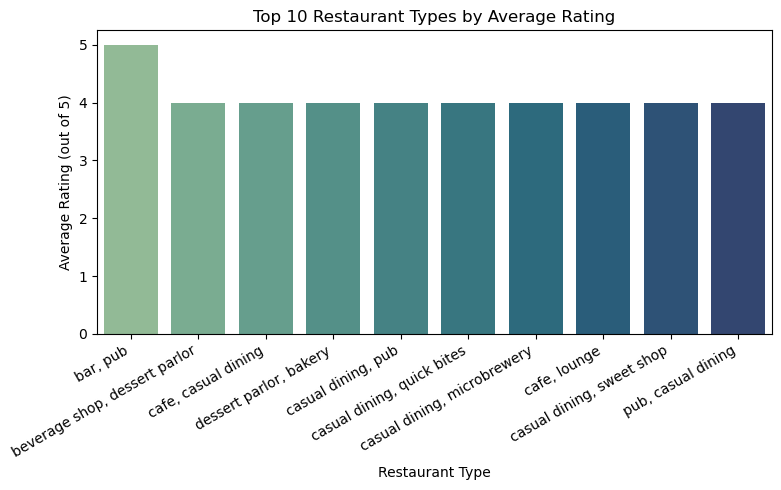

In [41]:
# Group and compute mean rating
avg_rating = df.groupby('restaurant_type')['rate_(out_of_5)'].mean().sort_values(ascending=False)

# Take top 10
top10 = avg_rating.head(10).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='restaurant_type', y='rate_(out_of_5)',hue='restaurant_type', data=top10, palette='crest')
plt.title('Top 10 Restaurant Types by Average Rating')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating (out of 5)')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


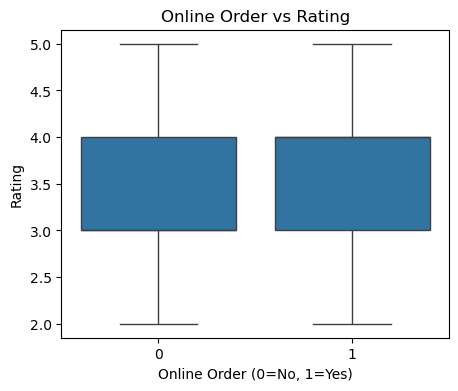

In [34]:
#️⃣ Online order vs rating
plt.figure(figsize=(5,4))
sns.boxplot(x='online_order', y='rate_(out_of_5)', data=df)
plt.title('Online Order vs Rating')
plt.xlabel('Online Order (0=No, 1=Yes)')
plt.ylabel('Rating')
plt.show()

The presence of online ordering doesn’t seem to significantly influence customer ratings.
Both restaurants with and without online ordering have similar average and median ratings,
    suggesting that customers judge food quality and experience similarly regardless of online availability.
Although online ordering is a popular feature, it does not necessarily lead to higher customer satisfaction or 
better ratings, indicating that factors such as food quality, 
service, and ambiance may play a more influential role.”

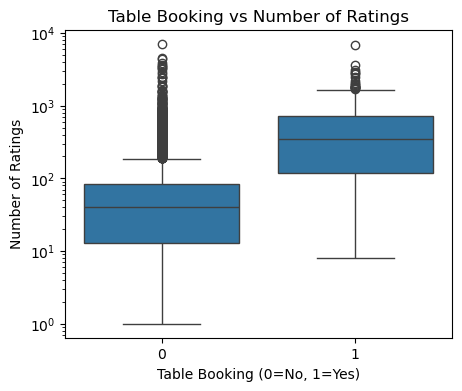

In [36]:
#⃣ Table booking vs number of ratings
plt.figure(figsize=(5,4))
sns.boxplot(x='table_booking', y='num_of_ratings', data=df)
plt.title('Table Booking vs Number of Ratings')
plt.xlabel('Table Booking (0=No, 1=Yes)')
plt.ylabel('Number of Ratings')
plt.yscale('log')  # helps with skewed counts
plt.show()

Restaurants that allow table 
booking generally have more customer ratings on average, suggesting they are more popular, larger, or 
attract more online engagement than restaurants that don’t offer booking.

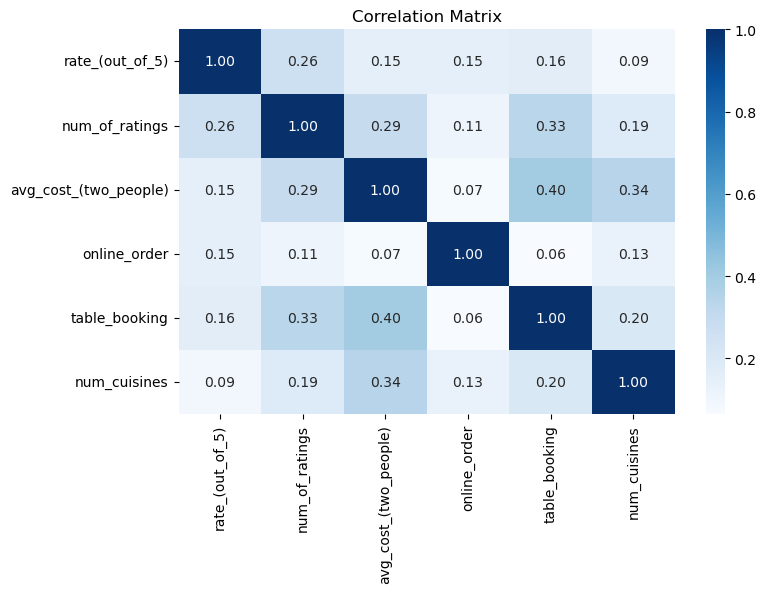

In [42]:
#  Correlation heatmap
plt.figure(figsize=(8,5))
corr = df[['rate_(out_of_5)', 'num_of_ratings', 'avg_cost_(two_people)', 'online_order', 'table_booking', 'num_cuisines']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Conclusion

The correlation analysis shows that most features are weakly to moderately correlated, meaning no single factor strongly influences another. However:

Higher-cost restaurants tend to offer table booking and serve more cuisines.

Restaurants with table booking options often receive more customer ratings.

Online ordering has minimal impact on other attributes, suggesting it is widely adopted across restaurant types.

Ratings are largely independent of cost or booking options — they depend more on customer experience rather than price or services.

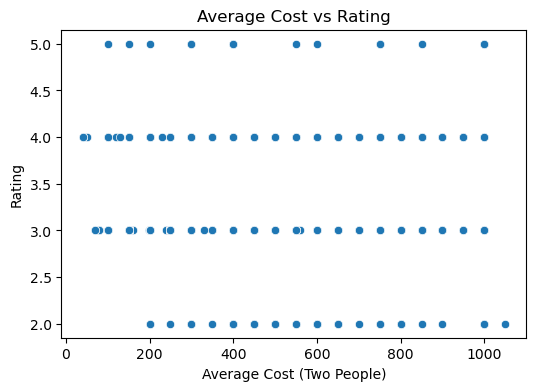

In [43]:
#  Cost vs Rating scatter
plt.figure(figsize=(6,4))
sns.scatterplot(x='avg_cost_(two_people)', y='rate_(out_of_5)', data=df)
plt.title('Average Cost vs Rating')
plt.xlabel('Average Cost (Two People)')
plt.ylabel('Rating')
plt.show()

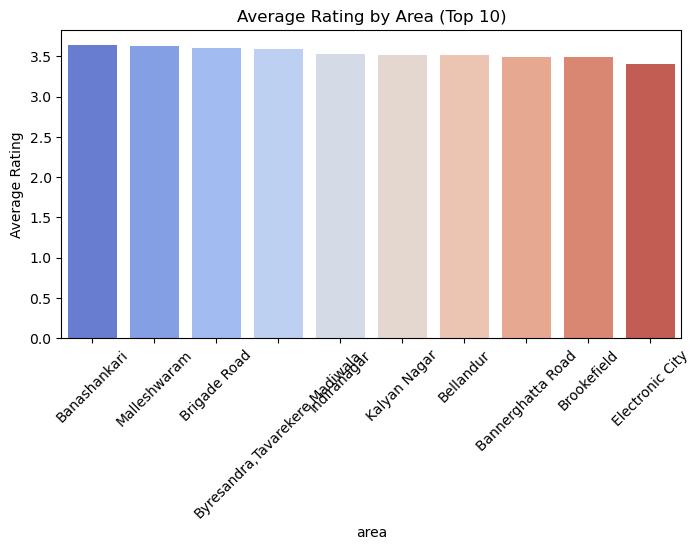

In [48]:
# 19️⃣ Area-wise average rating (top 10)
top_areas = df['area'].value_counts().nlargest(10).index
area_avg = df[df['area'].isin(top_areas)].groupby('area')['rate_(out_of_5)'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=area_avg.index, y=area_avg.values,hue=area_avg.index, palette='coolwarm')
plt.title('Average Rating by Area (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.show()

In [ ]:
“Customer satisfaction, as measured by ratings, 
is fairly consistent across the top 10 areas. However, Banashankari and Malleswaram stand out slightly as having 
the most positively rated restaurants
while Electronic City and Brookefield show marginally lower satisfaction levels.”

In [49]:
df.to_csv('cleaned_restaurant_data.csv', index=False)
print("\n Cleaned dataset saved as 'cleaned_restaurant_data.csv'")


 Cleaned dataset saved as 'cleaned_restaurant_data.csv'
